# Utilização TensorFLow

## Instalação Biblioteca

In [70]:
!pip install ucimlrepo
!pip install tensorflow 
!pip install scikit-learn

## Importando dados

In [71]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
doenca_cardiaca = fetch_ucirepo(id=45)

### Dados Básicos

In [73]:
doenca_cardiaca.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

In [74]:
doenca_cardiaca.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


## Selecionando campos

In [75]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [76]:
X.head()

,age,chol,cp
0,63,233,1
1,67,286,4
2,67,229,4
3,37,250,3
4,41,204,2


In [77]:
target = doenca_cardiaca.data.targets
target['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [78]:

target = (target > 0) * 1
target.head()

,num
0,0
1,1
2,1
3,0
4,0


In [79]:
df = X
df['y'] = target
df.head()

C:\Users\anderson\AppData\Local\Temp\ipykernel_21088\3045763234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = target


,age,chol,cp,y
0,63,233,1,0
1,67,286,4,1
2,67,229,4,1
3,37,250,3,0
4,41,204,2,0


## Gráficos

### Boxplot

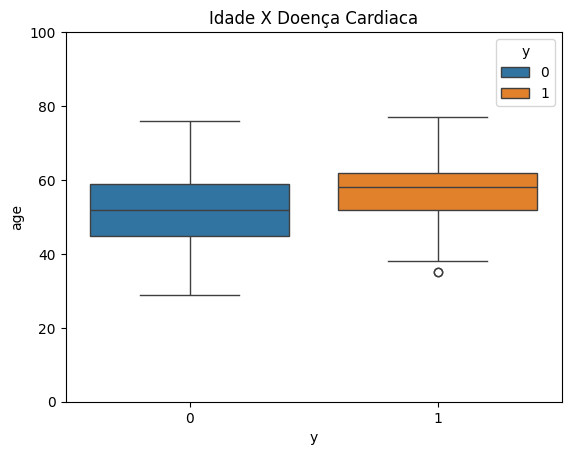

In [80]:
sns.boxplot(x='y', y='age', hue='y', data=df)
plt.title('Idade X Doença Cardiaca')
plt.ylim(0, 100)
plt.show()

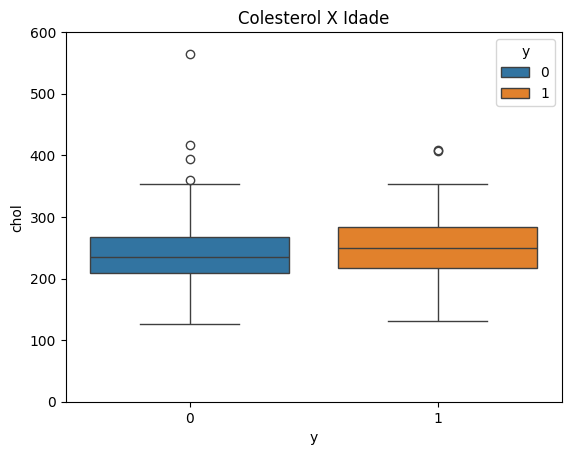

In [81]:
sns.boxplot(x='y', y='chol', hue='y', data=df)
plt.title('Colesterol X Idade')
plt.ylim(0, 600)
plt.show()

#### Verificando Correlação

In [82]:
df[['age', 'chol','y']].corr()

,age,chol,y
age,1.00000,0.208950,0.223120
chol,0.20895,1.000000,0.085164
y,0.22312,0.085164,1.000000


### SwarmPLot

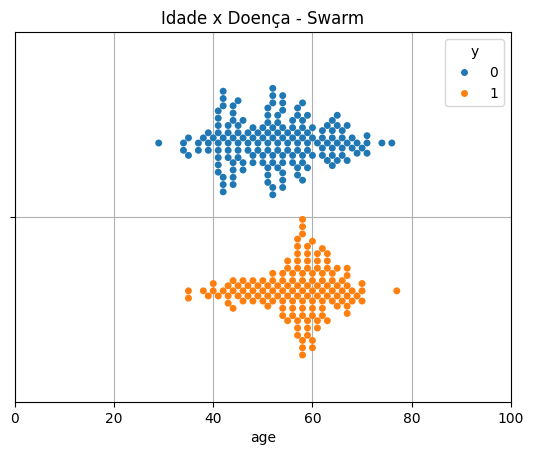

In [83]:
sns.swarmplot(data=df, x='age', hue='y', dodge=True)
plt.title('Idade x Doença - Swarm')
plt.xlim(0, 100)
plt.grid()
plt.show()

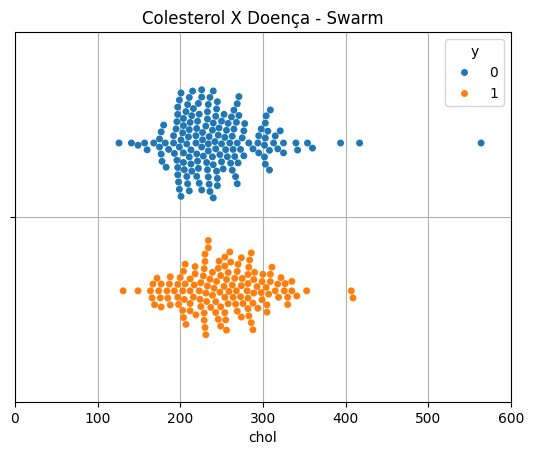

In [84]:
sns.swarmplot(data=df, x='chol', hue='y', dodge=True)
plt.title('Colesterol X Doença - Swarm')
plt.xlim(0, 600)
plt.grid()
plt.show()

## Preparando os Dados

In [85]:
X['cp'].unique()

array([1, 4, 3, 2], dtype=int64)

In [86]:
df_cp = pd.get_dummies(X['cp'], prefix='cp')
df_cp = df_cp * 1
df_cp.head()

,cp_1,cp_2,cp_3,cp_4
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [87]:
X1 = X.drop('cp', axis=1).join(df_cp)
X1.head()

,age,chol,y,cp_1,cp_2,cp_3,cp_4
0,63,233,0,1,0,0,0
1,67,286,1,0,0,0,1
2,67,229,1,0,0,0,1
3,37,250,0,0,0,1,0
4,41,204,0,0,1,0,0


In [88]:
X2 = doenca_cardiaca.data.features
X2 = X2[['age', 'trestbps', 'restecg']]

In [89]:
df_restecg = pd.get_dummies(X2['restecg'], prefix='restecg')
df_restecg.head()

,restecg_0,restecg_1,restecg_2
0,False,False,True
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True


In [90]:
X2 = X2.drop('restecg', axis=1).join(df_restecg)
X2.head()

,age,trestbps,restecg_0,restecg_1,restecg_2
0,63,145,False,False,True
1,67,160,False,False,True
2,67,120,False,False,True
3,37,130,True,False,False
4,41,130,False,False,True


## Iniciando - TensorFlow

In [91]:
tf.random.set_seed(31)

In [92]:
peso = tf.Variable(tf.random.normal([1]), mame='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies')

In [93]:
peso

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3594139], dtype=float32)>

In [94]:
vies

<tf.Variable 'vies:0' shape=(1,) dtype=float32, numpy=array([0.15100643], dtype=float32)>

In [95]:
print(f'Peso => {peso.numpy()} \nVies => {vies.numpy()}')

Peso => [-0.3594139] 
Vies => [0.15100643]


### Perceptron - Exemplo

### Exemplo Código

In [96]:
def neuronio(x):
    return tf.add(tf.multiply(x,peso), vies)    

In [97]:
exemplo = tf.constant(10.0)
neuronio(exemplo)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-3.4431324], dtype=float32)>

In [98]:
def gerar_grafico():
    x = np.linspace(-10, 10, 100)
    y = tf.sin(x)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.title('Função Seno')
    plt.show()

def gerar_grafico_sigmoid():
    x = np.linspace(-10, 10, 100)
    y = (tf.sin(x) + 1)/2
    y2 = tf.sigmoid(x)

    plt.plot(x, y)
    plt.plot(x, y2)

    plt.xlabel('x')
    plt.title('Função Seno x Sigmoid')
    plt.show()    

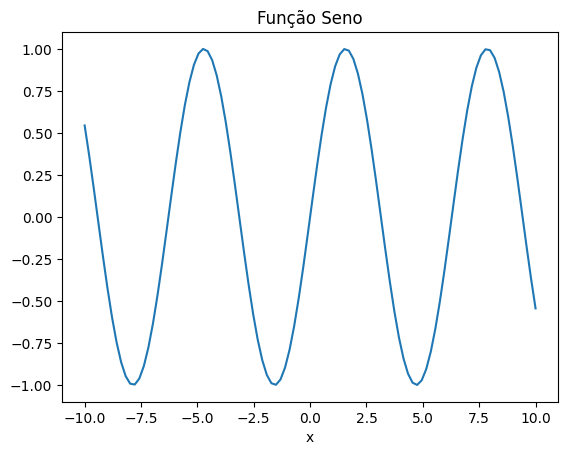

In [99]:
gerar_grafico()

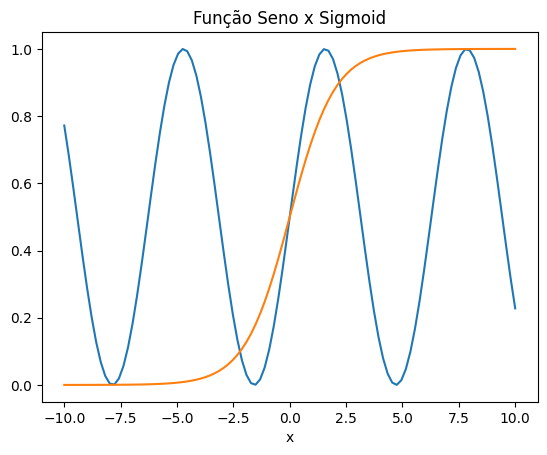

In [100]:
gerar_grafico_sigmoid()

In [101]:
probabilidde = tf.sigmoid(neuronio(tf.constant([10.0])))
probabilidde

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.03097433], dtype=float32)>

In [102]:
probabilidde > 0.5

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([False])>

### Trabalhando com o REPO

In [103]:
probabilidde = tf.sigmoid(neuronio(tf.constant(X['chol'], dtype=tf.float32)))

In [104]:
(probabilidde > 0.5)[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False])>

### Analisar Perda

In [105]:
y = tf.constant(target, dtype=tf.float32)
y[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [106]:
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y, y_pred=probabilidde)
perda

<tf.Tensor: shape=(), dtype=float32, numpy=7.3941092>

In [107]:
np.mean(y.numpy() == ((probabilidde.numpy() > 0.5) * 1))

0.5412541254125413

### Melhorando acuracia do modelo

In [108]:
scaler = StandardScaler()

In [109]:
X1[['age','chol']] = scaler.fit_transform(X1[['age','chol']])

print('Primeiros valores normalizados de age: \n', X1['age'].head())
print('Primeiros valores normalizados de chol: \n', X1['chol'].head())

Primeiros valores normalizados de age: 
 0    0.948726
1    1.392002
2    1.392002
3   -1.932564
4   -1.489288
Name: age, dtype: float64
Primeiros valores normalizados de chol: 
 0   -0.264900
1    0.760415
2   -0.342283
3    0.063974
4   -0.825922
Name: chol, dtype: float64


In [110]:
# Obter quantidade de colunas do Dataframe
X1 = X1.drop(columns='y')

In [111]:
X1.shape[1]

6

In [112]:
tf.random.set_seed(31)
quantidade_features = X1.shape[1]
peso = tf.Variable(tf.random.normal([quantidade_features, 1], name='peso'))
vies = tf.Variable(tf.random.normal([1]), name='vies')

#Atualizado função neuronio para trabalhar com Matiz (Varios Pesos)
def neuronio(x):
    return tf.add(tf.matmul(x, peso), vies)

In [113]:
vies.numpy(), peso.numpy()

(array([0.15100643], dtype=float32),
 array([[-0.3594139 ],
        [ 0.18532915],
        [ 2.3871737 ],
        [ 0.9996345 ],
        [ 0.09981808],
        [-0.06186233]], dtype=float32))

In [114]:
#verificar os pesos dos 1 valores de entrada
X1.iloc[0].values

array([ 0.94872647, -0.2649003 ,  1.        ,  0.        ,  0.        ,
        0.        ])

#### Entendendo calculo de probabilidade para 1 linha do DataFrame

In [115]:
#Realizando a multiplocação matricial entre os pesos e vies
neuronio(tf.constant([[ 0.94872647, -0.2649003 ,  1.,  0., 0., 0.]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.1481009]], dtype=float32)>

In [116]:
# Analisando a probabilidade dessa primeira linha
probabilidde = tf.sigmoid(neuronio(tf.constant([[ 0.94872647, -0.2649003 ,  1.,  0., 0., 0.]])))
probabilidde

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.8954912]], dtype=float32)>

#### Aplicando a analise ao DataFrame

In [117]:
entrada = tf.constant(X1, tf.float32)
probabilidde = tf.sigmoid(neuronio(entrada))
probabilidde[:10].numpy()

array([[0.8954912 ],
       [0.43284968],
       [0.38352907],
       [0.7225751 ],
       [0.8224221 ],
       [0.7407991 ],
       [0.46614692],
       [0.5919095 ],
       [0.44382712],
       [0.4974511 ]], dtype=float32)

#### Nova analise de Perda

In [118]:
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y, y_pred=probabilidde)
perda.numpy()

0.9295625

In [119]:
acuracia = np.mean( y.numpy() == ((probabilidde.numpy() > 0.5) *1) )
acuracia

0.3696369636963696

#### Entendendo a aplicação de Gradiente

In [120]:
entrada[:3], y[:3]

(<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
 array([[ 0.9487265, -0.2649003,  1.       ,  0.       ,  0.       ,
          0.       ],
        [ 1.3920019,  0.7604152,  0.       ,  0.       ,  0.       ,
          1.       ],
        [ 1.3920019, -0.3422826,  0.       ,  0.       ,  0.       ,
          1.       ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.],
        [1.],
        [1.]], dtype=float32)>)

In [121]:
# Taxa de Aprendizado
learning_rate = 0.01
# Escolha do Otimizador
otimizador = tf.optimizers.SGD(learning_rate=learning_rate)
# Quantidade de Interações
quantidade_epocas = 1000

In [122]:
for epoca in range(quantidade_epocas):
    with tf.GradientTape() as tape:
        probabilidde = tf.sigmoid(neuronio(entrada))
        custo = calculadora_perda(y, probabilidde)

    gradientes = tape.gradient(custo, [peso, vies])
    otimizador.apply_gradients(zip(gradientes, [peso, vies]))

    if epoca % 100 == 0:
        print(f'Epoca: {epoca} - Custo: {custo}')

Epoca: 0 - Custo: 0.929562509059906
Epoca: 100 - Custo: 0.8533761501312256
Epoca: 200 - Custo: 0.7980514764785767
Epoca: 300 - Custo: 0.7571552991867065
Epoca: 400 - Custo: 0.726005494594574
Epoca: 500 - Custo: 0.7015069127082825
Epoca: 600 - Custo: 0.6816807389259338
Epoca: 700 - Custo: 0.6652563810348511
Epoca: 800 - Custo: 0.6513981819152832
Epoca: 900 - Custo: 0.6395381689071655


In [123]:
acerto = np.mean(y.numpy() == ((probabilidde.numpy() > 0.5)*1))
acerto

0.7161716171617162

## Separando dados para Treinamento e Teste

In [124]:
X3 = X.copy()
X3 = X3.drop(['cp', 'y'], axis=1).join(df_cp)

In [125]:
entrada = tf.constant(X3, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [126]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
                                                        stratify=y.numpy(), random_state=4321)

In [127]:
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.fit_transform(X_teste)

X_treino = tf.constant(X_treino, dtype=tf.float32)
X_teste = tf.constant(X_teste, dtype=tf.float32)
Y_treino = tf.constant(Y_treino, dtype=tf.float32)
X_teste = tf.constant(Y_teste, dtype=tf.float32)

In [128]:
def run_all():
    global peso, vies
    tf.random.set_seed(31)
    peso = tf.Variable(tf.random.normal([quantidade_features, 1], name='peso'))
    vies = tf.Variable(tf.random.normal([1]), name='vies')

    # Escolha do Otimizador
    otimizador = tf.optimizers.SGD(learning_rate=learning_rate)

    perdas = []
    for epoca in range(quantidade_epocas):
        with tf.GradientTape() as type:
            probabilidde = tf.sigmoid(neuronio(X_treino))
            custo = calculadora_perda(Y_treino, probabilidde)

        gradientes = type.gradient(custo, [peso, vies])
        otimizador.apply_gradients(zip(gradientes, [peso, vies]))

        perdas.append(custo.numpy())
        if (epoca + 1) % 100 == 0:
            print(f'Epoca: {epoca+1} - Custo: {custo}')
    
    return perdas

In [129]:
def print_grafico(perdas):
    plt.plot(perdas)
    plt.title('Perda por época')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.show()

Epoca: 100 - Custo: 1.4142351150512695
Epoca: 200 - Custo: 1.4103834629058838
Epoca: 300 - Custo: 1.406550407409668
Epoca: 400 - Custo: 1.4027353525161743
Epoca: 500 - Custo: 1.3989380598068237
Epoca: 600 - Custo: 1.3951616287231445
Epoca: 700 - Custo: 1.3914016485214233
Epoca: 800 - Custo: 1.3876588344573975
Epoca: 900 - Custo: 1.3839372396469116
Epoca: 1000 - Custo: 1.380230188369751


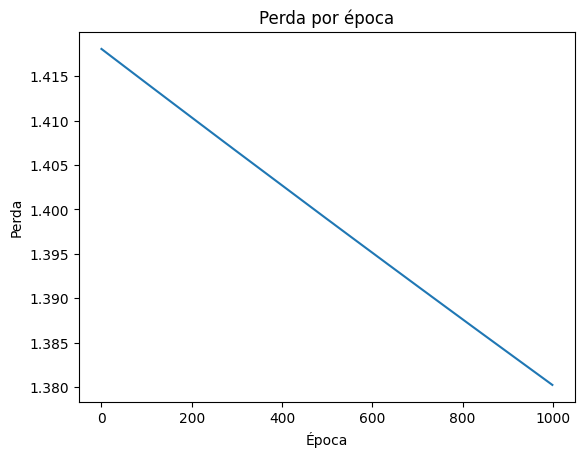

In [130]:
learning_rate = 0.0001
perdas_0001 = run_all()
print_grafico(perdas_0001)

Epoca: 100 - Custo: 1.1161863803863525
Epoca: 200 - Custo: 0.9429415464401245
Epoca: 300 - Custo: 0.8417730927467346
Epoca: 400 - Custo: 0.7737216353416443
Epoca: 500 - Custo: 0.721126139163971
Epoca: 600 - Custo: 0.6769370436668396
Epoca: 700 - Custo: 0.6389647722244263
Epoca: 800 - Custo: 0.6073908805847168
Epoca: 900 - Custo: 0.5830886960029602
Epoca: 1000 - Custo: 0.5660953521728516


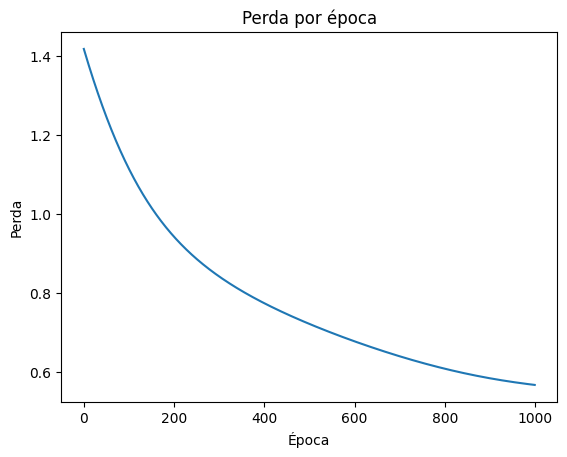

In [131]:
learning_rate = 0.01
perdas_01 = run_all()
print_grafico(perdas_01)

Epoca: 100 - Custo: 0.537421703338623
Epoca: 200 - Custo: 0.537421703338623
Epoca: 300 - Custo: 0.537421703338623
Epoca: 400 - Custo: 0.537421703338623
Epoca: 500 - Custo: 0.537421703338623
Epoca: 600 - Custo: 0.537421703338623
Epoca: 700 - Custo: 0.537421703338623
Epoca: 800 - Custo: 0.537421703338623
Epoca: 900 - Custo: 0.537421703338623
Epoca: 1000 - Custo: 0.537421703338623


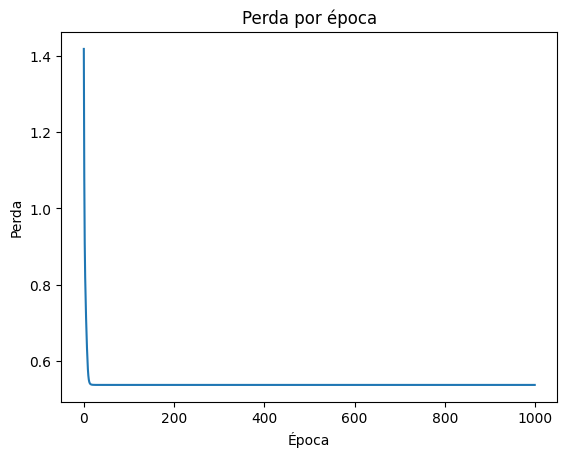

In [132]:
learning_rate = 1.
perdas_1 = run_all()
print_grafico(perdas_1)

Epoca: 100 - Custo: 0.601140022277832
Epoca: 200 - Custo: 0.5952907800674438
Epoca: 300 - Custo: 0.5798757672309875
Epoca: 400 - Custo: 0.7539663910865784
Epoca: 500 - Custo: 0.5952688455581665
Epoca: 600 - Custo: 0.5798757672309875
Epoca: 700 - Custo: 0.7539665699005127
Epoca: 800 - Custo: 0.5952688455581665
Epoca: 900 - Custo: 0.5798757672309875
Epoca: 1000 - Custo: 0.7539663314819336


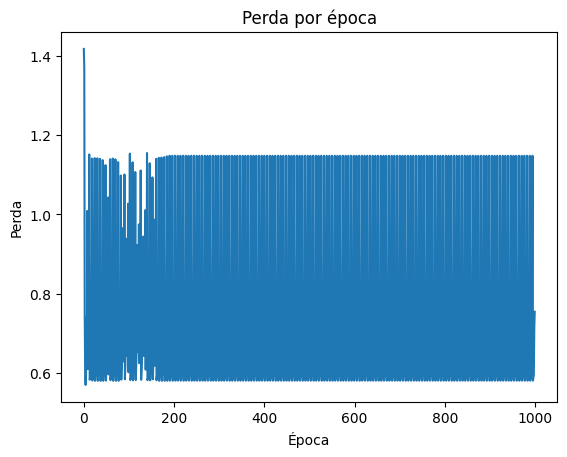

In [133]:
learning_rate = 10.
perdas_10 = run_all()
print_grafico(perdas_10)

Epoca: 100 - Custo: 1.2473961114883423
Epoca: 200 - Custo: 1.1151849031448364
Epoca: 300 - Custo: 1.0163267850875854
Epoca: 400 - Custo: 0.9424502849578857
Epoca: 500 - Custo: 0.8860569596290588
Epoca: 600 - Custo: 0.8414801359176636
Epoca: 700 - Custo: 0.8048160672187805
Epoca: 800 - Custo: 0.7735002040863037
Epoca: 900 - Custo: 0.7458857297897339
Epoca: 1000 - Custo: 0.7209340929985046


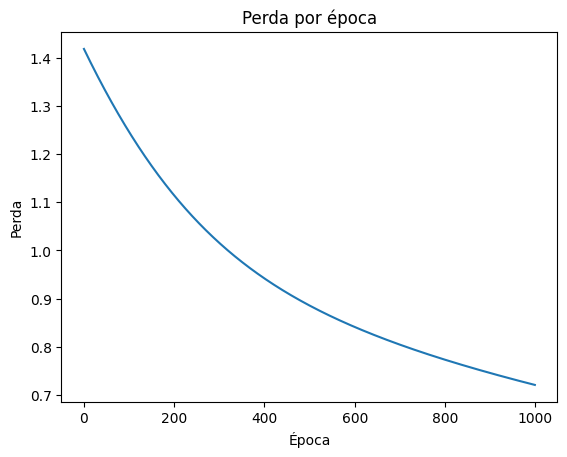

In [134]:
learning_rate = 0.005
perdas_005 = run_all()
print_grafico(perdas_005)

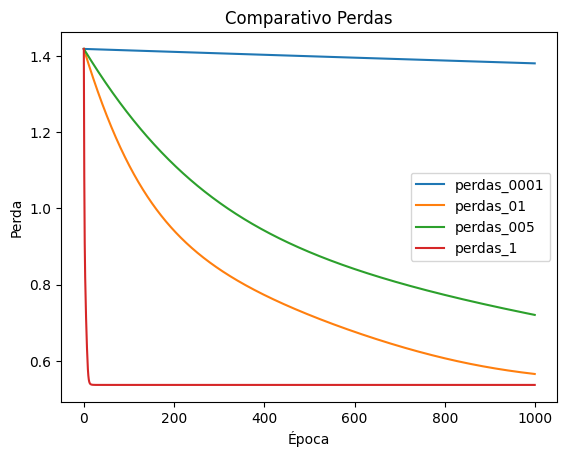

In [135]:
plt.plot(perdas_0001)
plt.plot(perdas_01)
plt.plot(perdas_005)
plt.plot(perdas_1)
#plt.plot(perdas_10)
plt.title('Comparativo Perdas')
plt.legend(['perdas_0001', 'perdas_01', 'perdas_005', 'perdas_1', 'perdas_10'])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

### Taxa de acerto - Treino

In [136]:
entrada = tf.constant(X3, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

X_treino, X_teste, Y_treino, Y_teste = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
                                                        stratify=y.numpy(), random_state=4321)

In [144]:
perdas = []
taxa_acerto = []

learning_rate = 0.01
otimizador = tf.optimizers.SGD(learning_rate=learning_rate)

tf.random.set_seed(31)

quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1], name='pesos'))
vies = tf.Variable(tf.random.normal([1]), name='vies')

# Obter custo
for epoca in range(quantidade_epocas):
    with tf.GradientTape() as tape:
        probabilidde = tf.sigmoid(neuronio(X_treino))
        custo = calculadora_perda(Y_treino, probabilidde)

        gradientes = tape.gradient(custo, [pesos, vies])
        otimizador.apply_gradients(zip(gradientes, [pesos, vies]))

        #calculando a taxa de acerto nos dados de teste
        probabilidde_teste = tf.sigmoid(neuronio(X_teste))
        acertos = np.mean(Y_teste == ((probabilidde_teste.numpy() > 0.5)* 1))

        taxa_acerto.append(acertos)
        perdas.append(custo.numpy())

    if (epoca + 1) % 100 == 0:
        print(f'Epoca: {epoca+1} - Custo: {custo.numpy()} - Taxa de Acertos: {acertos}')

C:\Users\anderson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['Variable:0'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoca: 100 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 200 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 300 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 400 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 500 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 600 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 700 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 800 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 900 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296
Epoca: 1000 - Custo: 8.629968643188477 - Taxa de Acertos: 0.45901639344262296


In [ ]:
print(f'Menor custo obtido Perceptron: {min(perdas)}')
print(f'Mairo taxa de acerto com um perceptron: {max(taxa_acerto)}')